In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip -uq '/content/drive/MyDrive/data/딥러닝/235842_작물 병해 분류 AI 경진대회_data.zip' -d './'

In [4]:
import numpy as np
import pandas as pd
from PIL import Image 
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt


df = pd.read_csv('train.csv')

In [4]:
df.head()

,uid,img_path,disease,disease_code
0,10000,train_imgs/10000.jpg,시설포도노균병,1
1,10001,train_imgs/10001.jpg,시설포도노균병,1
2,10002,train_imgs/10002.jpg,시설포도노균병반응,2
3,10003,train_imgs/10003.jpg,축과병,4
4,10004,train_imgs/10004.jpg,시설포도노균병,1


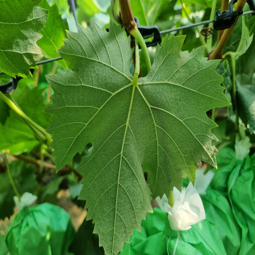

In [4]:
img1 = Image.open(df['img_path'][0])
#img1 = img_to_array(img1)
img1.resize((255,255))

In [5]:
#import zipfile
#local_zip = './235842_작물 병해 분류 AI 경진대회_data.zip'
##zip_ref = zipfile.ZipFile(local_zip, 'r')
#zip_ref.extractall('./작물병해분류')
#zip_ref.close()

## 이미지, 라벨 x,y에 저장

In [6]:
x= []
y =[]
for i, j in zip(df.img_path, df.disease_code):
  image = Image.open(i)
  image = image.resize((255,255)) #괄호 두개 있지말자
  image = img_to_array(image) / 255
  x.append(image)
  y.append(j)


In [7]:
x[0].shape, len(x), len(y) # 길이확인

((255, 255, 3), 250, 250)

In [8]:
np.unique(y) # y값의 개수 확인 7개

array([0, 1, 2, 3, 4, 5, 6])

In [9]:
np.shape(x)

(250, 255, 255, 3)

In [10]:
y = np.array(y)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                  test_size = 0.3, random_state = 777)

In [11]:
len(x_train), len(x_test), len(y_train), len(y_test)

(175, 75, 175, 75)

In [12]:
np.shape(x_train), np.shape(x_test), np.shape(y_train), np.shape(y_test)

((175, 255, 255, 3), (75, 255, 255, 3), (175,), (75,))

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

model = Sequential()
# (255, 255, 3)의 데이터를 입력으로 받습니다. 
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (255, 255, 3)))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))

model.add(Dense(7, activation = 'softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 255, 255, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 255, 255, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 128)       7

In [15]:
model.compile(optimizer = Adam(1e-4),
             loss = 'sparse_categorical_crossentropy', # 원핫 안해도 마지막 dense 2개로 할수 있다 
             metrics = ['acc'])

In [17]:
history = model.fit(np.array(x_train), np.array(y_train),
                    epochs = 15,
                    batch_size = 32,
                    validation_data = (np.array(x_test), np.array(y_test)))

Epoch 1/15
6/6 [==============================] - 6s 1s/step - loss: 1.7129 - acc: 0.3943 - val_loss: 1.6113 - val_acc: 0.4933
Epoch 2/15
6/6 [==============================] - 2s 350ms/step - loss: 1.6143 - acc: 0.4457 - val_loss: 1.5493 - val_acc: 0.4933
Epoch 3/15
6/6 [==============================] - 2s 356ms/step - loss: 1.5270 - acc: 0.4000 - val_loss: 1.4678 - val_acc: 0.5200
Epoch 4/15
6/6 [==============================] - 2s 351ms/step - loss: 1.4343 - acc: 0.5543 - val_loss: 1.4432 - val_acc: 0.5067
Epoch 5/15
6/6 [==============================] - 2s 354ms/step - loss: 1.2358 - acc: 0.5257 - val_loss: 1.2741 - val_acc: 0.5467
Epoch 6/15
6/6 [==============================] - 2s 351ms/step - loss: 1.1138 - acc: 0.5714 - val_loss: 1.1580 - val_acc: 0.4933
Epoch 7/15
6/6 [==============================] - 2s 354ms/step - loss: 0.8721 - acc: 0.6629 - val_loss: 1.0287 - val_acc: 0.5467
Epoch 8/15
6/6 [==============================] - 2s 357ms/step - loss: 0.6657 - acc: 0.7886 

## 폴더별로 정리

In [ ]:
# df 에 있는 파일경로 읽어서 옮기기? 디스크 용량이 너무 없다는데..
# df를 train test 로 나눈뒤 각각 따로 train 폴더와 test 폴더에 저자항면 될까?

In [ ]:
#/data/train 1 2 3 4 5 6 폴더를 만든다

In [75]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3, random_state=32)

In [76]:
df.img_path[0].split('/')[-1]

'10000.jpg'

In [78]:
import shutil 
import os

In [79]:
os.mkdir('data')
os.mkdir('data/train')
os.mkdir('data/test')

FileExistsError: ignored

In [80]:
import os
for path, d_code in zip(train.img_path, train.disease_code):
  f_name = path.split('/')[-1]
  
  if os.path.isdir(f'data/train/'+str(d_code))==False:
    os.mkdir('data/train/'+str(d_code))
  try:
    shutil.move(path, f'data/train/{d_code}/{f_name}')
  except:
    print('이미있음')


이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음


In [81]:
import os
for path, d_code in zip(test.img_path, test.disease_code):
  f_name = path.split('/')[-1]
  
  if os.path.isdir(f'data/test/'+str(d_code))==False:
    os.mkdir('data/test/'+str(d_code))
  try:
    shutil.move(path, f'data/test/{d_code}/{f_name}')
  except:
    print('이미있음')


이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음
이미있음


In [82]:
base_dir = './data'
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir,'test')

In [19]:
train_0 = os.path.join(train_dir,'0')
train_1 = os.path.join(train_dir,'1')
train_2 = os.path.join(train_dir,'2')
train_3 = os.path.join(train_dir,'3')
train_4 = os.path.join(train_dir,'4')
train_5 = os.path.join(train_dir,'5')
train_6 = os.path.join(train_dir,'6')
train_7 = os.path.join(train_dir,'7')

In [20]:
test_0 = os.path.join(test_dir,'0')
test_1 = os.path.join(test_dir,'1')
test_2 = os.path.join(test_dir,'2')
test_3 = os.path.join(test_dir,'3')
test_4 = os.path.join(test_dir,'4')
test_5 = os.path.join(test_dir,'5')
test_6 = os.path.join(test_dir,'6')
test_7 = os.path.join(test_dir,'7')

### 파일 가져오기

In [21]:
train_1_fnames = os.listdir(train_0)
train_2_fnames = os.listdir(train_1)
train_3_fnames = os.listdir(train_2)
train_4_fnames = os.listdir(train_3)
train_5_fnames = os.listdir(train_4)
train_6_fnames = os.listdir(train_5)
train_7_fnames = os.listdir(train_6)

In [22]:
test_1_fnames = os.listdir(test_0)
test_2_fnames = os.listdir(test_1)
test_3_fnames = os.listdir(test_2)
test_4_fnames = os.listdir(test_3)
test_5_fnames = os.listdir(test_4)
test_6_fnames = os.listdir(test_5)
test_7_fnames = os.listdir(test_6)

## genrator


In [88]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range= 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest') 
test_datagen = ImageDataGenerator(rescale=1./255)

In [89]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    target_size=(255,255),
                                                    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                    batch_size=20,
                                                    target_size=(255,255),
                                                    class_mode='categorical')

Found 175 images belonging to 7 classes.
Found 75 images belonging to 7 classes.


In [90]:
len(train_generator[0])  

2

In [91]:
len(train_generator)

9

In [92]:
np.shape(train_generator[0][0])

(20, 255, 255, 3)

In [99]:
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(255, 255, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))   
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())   # 7*7*128=6272
model.add(layers.Dense(512, activation='relu'))  
model.add(layers.Dense(7, activation='softmax'))

In [86]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer = Adam(1e-4),
             loss = 'categorical_crossentropy', # 원핫 안해도 마지막 dense 2개로 할수 있다 
             metrics = ['acc'])

In [ ]:
history = model.fit_generator(
      train_generator,
      epochs=30,
      validation_data=test_generator,
      )

## vgg

In [101]:
from keras.applications import vgg16


VGG16_model = vgg16.VGG16(weights='imagenet',
                    include_top=False,
                    input_shape=(250, 250, 3))

58900480/58889256 [==============================] - 1s 0us/step


In [102]:
VGG16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 250, 250, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 250, 250, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 250, 250, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 125, 125, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 125, 125, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 125, 125, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 62, 62, 128)       0     

In [103]:
last_layer = VGG16_model.get_layer('block5_pool')
last_output = last_layer.output

In [105]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model

x = layers.Flatten()(last_output)


x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(7, activation='softmax')(x)

model = Model(VGG16_model.input, x)

model.compile(optimizer=RMSprop(lr=0.0001),
            loss='categorical_crossentropy',
            metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = model.fit(
  train_generator,
  validation_data=test_generator,
  epochs=20,
)

Epoch 1/20
9/9 [==============================] - 45s 4s/step - loss: 2.5183 - acc: 0.3314 - val_loss: 1.7133 - val_acc: 0.4000
Epoch 2/20
9/9 [==============================] - 24s 3s/step - loss: 1.6655 - acc: 0.4343 - val_loss: 1.6970 - val_acc: 0.4000
Epoch 3/20
9/9 [==============================] - 24s 3s/step - loss: 1.6257 - acc: 0.4343 - val_loss: 1.7009 - val_acc: 0.4000
Epoch 4/20
9/9 [==============================] - 24s 3s/step - loss: 1.5984 - acc: 0.4514 - val_loss: 1.8265 - val_acc: 0.4000
Epoch 5/20
9/9 [==============================] - 24s 3s/step - loss: 1.5986 - acc: 0.4343 - val_loss: 1.6399 - val_acc: 0.4000
Epoch 6/20
9/9 [==============================] - 24s 3s/step - loss: 1.5473 - acc: 0.4286 - val_loss: 1.6868 - val_acc: 0.4000
Epoch 7/20
6/9 [===================>..........] - ETA: 5s - loss: 1.8059 - acc: 0.4000